In [68]:
import tensorflow as tf

In [69]:
print(tf.__version__)

1.12.0


In [70]:
from tensorflow import keras

In [71]:
import numpy as np

In [72]:
import matplotlib.pyplot as plt

## Import Fashion MNIST dataset

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [73]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [74]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [75]:
train_images.shape

(60000, 28, 28)

In [76]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [77]:
test_images.shape

(10000, 28, 28)

## Preprocess the data

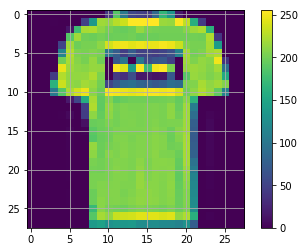

In [78]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar();
plt.grid(True);

In [79]:
train_images = train_images / 255.0
test_images = test_images / 255.0

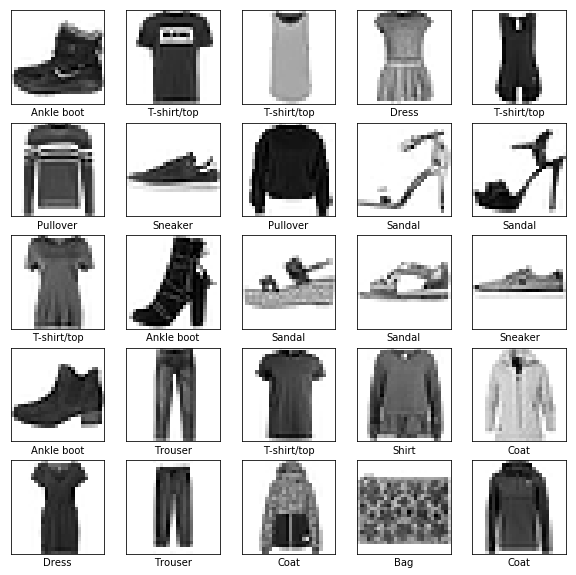

In [80]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

In [81]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [82]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.4984 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3778 - acc: 0.8629
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3403 - acc: 0.8765
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3120 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2954 - acc: 0.8912


## Evaluate accuracy

In [84]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 29us/step
Test accuracy: 0.8595


In [85]:
predictions = model.predict(test_images)

In [86]:
predictions[0]

array([7.1264679e-07, 2.5210006e-11, 1.7320934e-07, 1.9639885e-09,
       1.4499274e-07, 1.3662119e-04, 4.6826818e-07, 1.3901143e-02,
       3.4466018e-05, 9.8592627e-01], dtype=float32)

In [87]:
np.argmax(predictions[0])

9

In [88]:
test_labels[0]

9

In [89]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color= 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        class_names[true_label]),
              color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    


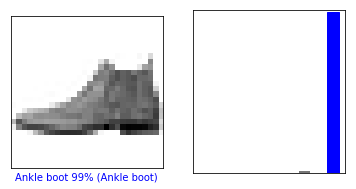

In [90]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

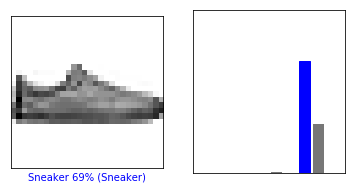

In [91]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

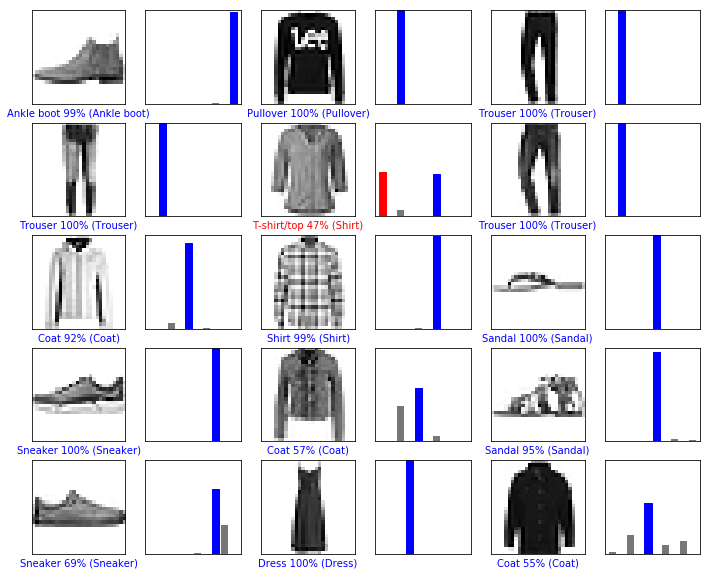

In [92]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)